# **Ejemplo 1. Clasificando Iris dataset**

https://archive.ics.uci.edu/ml/datasets/Iris


Empezamos por importar las librerías necesarias:

In [ ]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

Ahora importamos nuestro dataset (conjunto de datos):

In [ ]:
df = pd.read_csv('iris.csv')
df.head()

,sepalLengthCm,sepalWidthCm,petalLengthCm,petalWidthCm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Análisis exploratorio de datos

Obtenemos un resumen estadístico de nuestro dataset:

In [ ]:
df.describe()

,sepalLengthCm,sepalWidthCm,petalLengthCm,petalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Podemos también obtener algunos datos estadísticos como la media y la desviación estándar, por clase:

In [ ]:
df.groupby("species").mean()

,sepalLengthCm,sepalWidthCm,petalLengthCm,petalWidthCm
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [ ]:
df.groupby("species").std()

,sepalLengthCm,sepalWidthCm,petalLengthCm,petalWidthCm
species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


Podemos anticipar que la clase **setosa** está claramente separada de las otras dos, mientras que las clases **versicolor** y **virginica** parecen mezclarse un poco ya que presentan valores similares en media y desviación estándar, sobretodo en el ancho del sépalo.

Para tener una mejor idea de como "lucen" nuestros datos, vamos a graficarlos. Realizaremos un diagrama de dispersión por cada par de características (columnas) en nuestro dataset. Esto nos permitirá visualizar que tan dispersos están nuestros datos dentro de la misma clase y respecto a las demás. También nos permitirá concluir si estamos ante un problema lineal o no lineal.

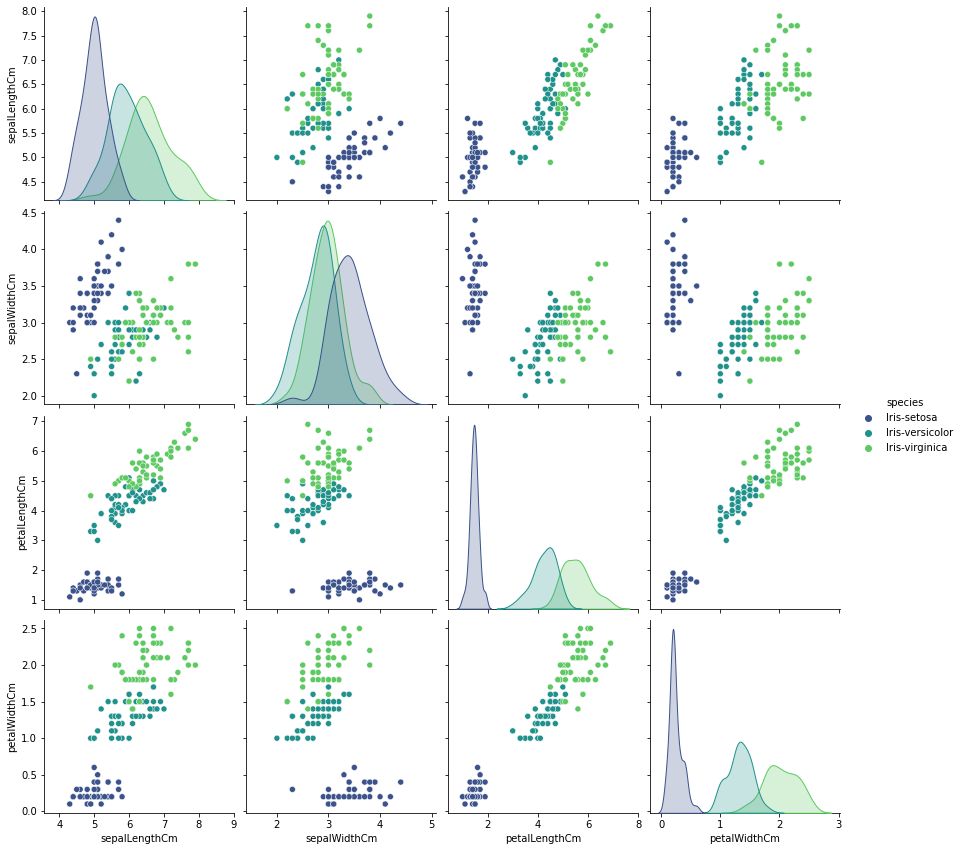

In [ ]:
sns.pairplot(df, hue="species", palette="viridis", height=3)

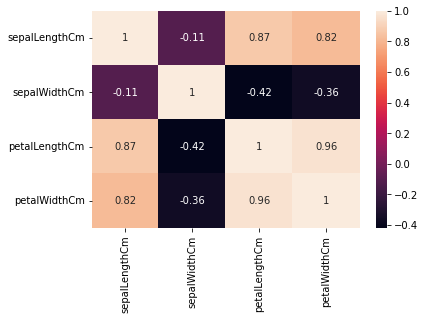

In [ ]:
sns.heatmap(df.corr(), annot=True)

# Etapa de entrenamiento

Una vez concluido el análisis exploratorio de datos, tenemos una mejor idea de como atacar este problema. Dado que las clases virginica y versicolor son linealmente no separables, ocupamos un clasificador no lineal. Uno de los más sencillos es el clasificador KNN (K-vecinos más cercanos, del inglés, K nearest neighbors) y es precisamente el que vamos a utilizar.

Primero hay que formar nuestros conjuntos de datos de entrenamiento y validación, para ello vamos a crear una variable **X** con las columnas que definen nuestras características y una variable **y** que viene siendo nuestra variable a predecir (la clase).

In [ ]:
X = df[['sepalLengthCm','sepalWidthCm','petalLengthCm','petalWidthCm']]
y = df.species
y.replace(to_replace =["Iris-setosa","Iris-versicolor","Iris-virginica"], value =[0,1,2], inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state = 0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X.values, train_y.values)

KNeighborsClassifier(n_neighbors=1)

# Etapa de evaluación

Una vez formado nuestro conjunto de entrenamiento, vamos a evaluar nuestro conjunto de prueba y a obtener la exactitud de nuestro clasificador:

In [ ]:
output = knn.predict(test_X.values)
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(test_y.values, output)
print("Exactitud : %0.1f%% " % (accuracy * 100))

Exactitud : 97.8% 


Creamos e imprimimos la matriz de confusión:

In [ ]:
pd.DataFrame(confusion_matrix(test_y, output))

,0,1,2
0,16,0,0
1,0,17,1
2,0,0,11
